# ELEG 6318-P01 - FINAL PROJECT - Convolutional Neural Networks (CNN)

- Goal: Compare performance differences generated with three CNNs that have different structures.

- Structure: CONV1(16, (3\*3))-Relu1-Maxpooling1(2\*2)-Dropout1(0.25)-CONV2(32, (3\*3)) -Relu2-Maxpooling2(2*2)-Dropout2(0.25)-Dense(512)-Relu3- Dropout3(0.5)-Output(Softmax)

In [43]:
#import packages
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import *
import os
import tensorflow as tf
import time
from tensorflow.keras import metrics
import pandas as pd
import shutil
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# setting hyper-parameters
batch_size = 32
num_classes = 2
epochs = 10

In [45]:
# load data
from google.colab import drive
drive.mount('/content/drive/')

data_path = "/content/drive/MyDrive/ELEG-6318-Lab-1"

# data_path = "/kaggle/input/covid/COVID_OLAMIDE"

In [46]:
#load your data
x_train = np.load(os.path.join(data_path, "x_train.npy"))
y_train = np.load(os.path.join(data_path, "y_train.npy"))
x_test = np.load(os.path.join(data_path, "x_test.npy"))
y_test = np.load(os.path.join(data_path, "y_test.npy"))

#verify the shapes of the loaded data
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (300, 224, 224, 3)
y_train shape:  (300,)
x_test shape:  (50, 224, 224, 3)
y_test shape:  (50,)


In [47]:
#assuming y_train and y_test are loaded and are numpy arrays containing your class labels

unique_classes = np.unique(y_train)
num_classes = len(unique_classes)

print(f'Number of unique classes: {num_classes}')

Number of unique classes: 2


In [48]:
# convert class vectors to binary class matrices.
# For example, for three classes, [0, 0, 1] -> 0, [0, 1, 0] -> 1, [1, 0, 0] -> 2

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# VISUALIZE THE DATASET WITH RANDOM IMAGES OF TRAIN AND TEST DATASET

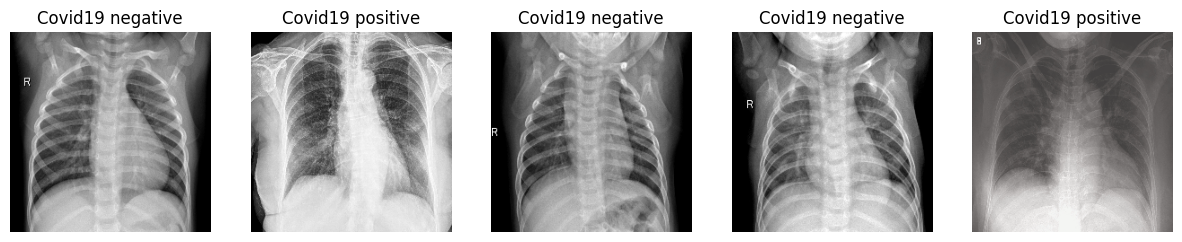

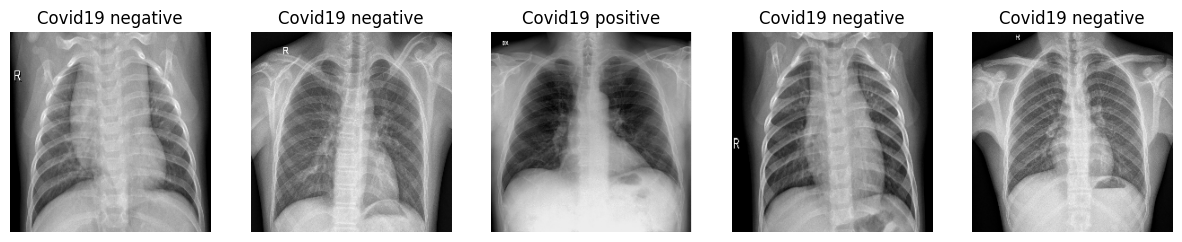

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Define labels
labels = ["Covid19 negative", "Covid19 positive"]

# Function to plot random images with labels
def plot_random_images(x_data, y_data, labels, num_images=5):
    # Get random indices
    random_indices = np.random.randint(0, len(x_data), num_images)
    
    # Create subplots
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    
    # Plot images with labels
    for i, idx in enumerate(random_indices):
        ax = axes[i]
        ax.imshow(x_data[idx])
        label_idx = y_data[idx] if isinstance(y_data[idx], int) else np.argmax(y_data[idx])
        ax.set_title(labels[label_idx])
        ax.axis('off')
    
    plt.show()

# Plot random images from x_train with their labels
plot_random_images(x_train, y_train, labels)

# Plot random images from x_test with their labels
plot_random_images(x_test, y_test, labels)


In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Define labels
labels = ["Covid19 negative", "Covid19 positive"]

# Function to find one negative and one positive image and save them separately
def save_one_negative_and_one_positive(x_data, y_data, labels, save_path_prefix):
    # Convert one-hot encoded labels to integer labels
    y_labels = np.argmax(y_data, axis=1) if len(y_data.shape) > 1 else y_data

    negative_idx = None
    positive_idx = None

    # Find one negative and one positive image
    for i in range(len(y_labels)):
        if y_labels[i] == 0 and negative_idx is None:
            negative_idx = i
        elif y_labels[i] == 1 and positive_idx is None:
            positive_idx = i
        if negative_idx is not None and positive_idx is not None:
            break

    # Plot and save the negative image
    plt.imshow(x_data[negative_idx])
    plt.title(labels[0])
    plt.axis('off')
    plt.savefig(f"{save_path_prefix}_negative.png")
    plt.close()

    # Plot and save the positive image
    plt.imshow(x_data[positive_idx])
    plt.title(labels[1])
    plt.axis('off')
    plt.savefig(f"{save_path_prefix}_positive.png")
    plt.close()

# Save one negative and one positive image
save_one_negative_and_one_positive(x_train, y_train, labels, "COVID-19")


# STRUCTURE 1

In [51]:
import tensorflow as tf
from tensorflow.keras import layers, models

#building a CNN model

model1 = models.Sequential()
model1.add(Conv2D(16, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(32, (3, 3),padding='same'))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes))
model1.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = tf.keras.optimizers.legacy.RMSprop(learning_rate = 0.0001, decay=1e-6)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
# Let's train the model using RMSprop
model1.compile(loss='binary_crossentropy',
              optimizer= optimizer,
              metrics=[metrics.BinaryAccuracy(name="accuracy"),
                       metrics.Precision(name="precision"),
                       metrics.Recall(name="recall")])

In [52]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 activation_14 (Activation)  (None, 224, 224, 16)      0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 112, 112, 16)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 activation_15 (Activation)  (None, 112, 112, 32)      0         
                                                      

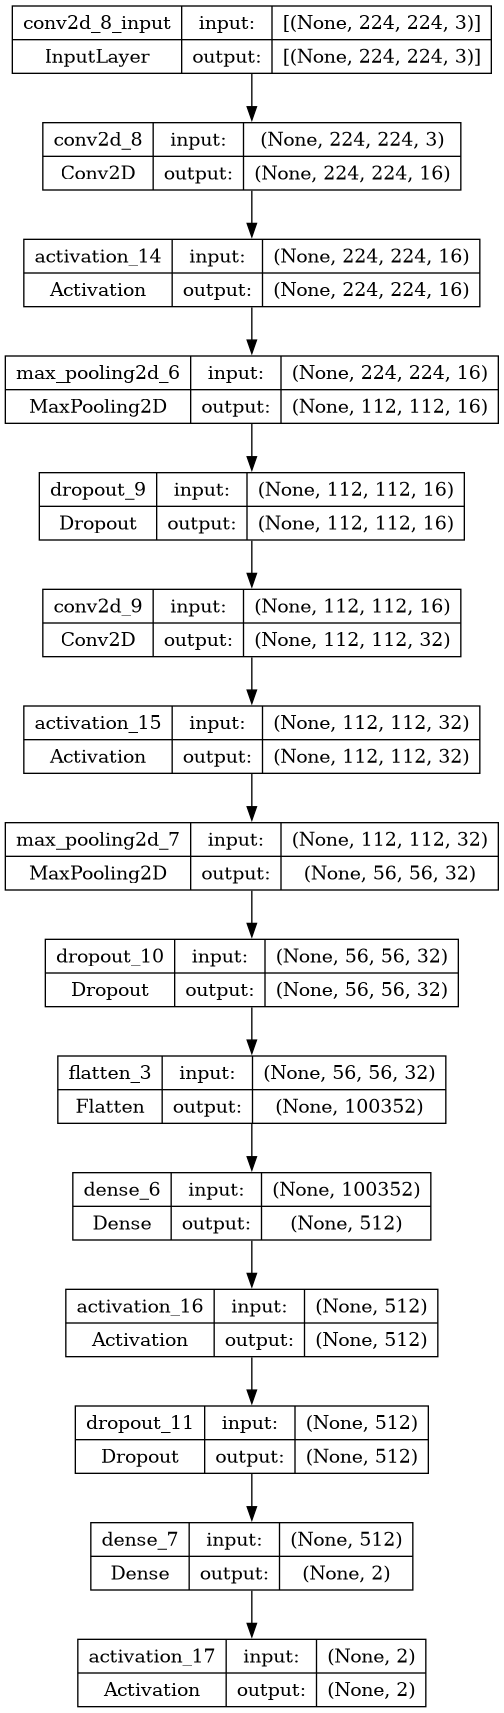

In [53]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Assuming model1 is your Keras model
# Plot the architecture of the model and save it to a file
plot_model(model1, to_file='model1_architecture.png', show_shapes=True)

# Alternatively, if you want to display the plot directly
# plot_model(model1, show_shapes=True)


In [54]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip = True,
    fill_mode="nearest"
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [55]:
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
test_generator = test_datagen.flow(x_test, y_test, batch_size=32)

In [56]:
start_time = time.time()

In [57]:
hist1 = model1.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(x_test, y_test),
                 shuffle=True
                 )

Epoch 1/10


2024-04-19 02:09:44.726145: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_9/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


10/10 [==============================] - 2s 67ms/step - loss: 0.5417 - accuracy: 0.7833 - precision: 0.7833 - recall: 0.7833 - val_loss: 0.3412 - val_accuracy: 0.8400 - val_precision: 0.8400 - val_recall: 0.8400
Epoch 2/10
10/10 [==============================] - 0s 35ms/step - loss: 0.2829 - accuracy: 0.8500 - precision: 0.8500 - recall: 0.8500 - val_loss: 0.3420 - val_accuracy: 0.8200 - val_precision: 0.8200 - val_recall: 0.8200
Epoch 3/10
10/10 [==============================] - 0s 34ms/step - loss: 0.2488 - accuracy: 0.8867 - precision: 0.8867 - recall: 0.8867 - val_loss: 0.2834 - val_accuracy: 0.8400 - val_precision: 0.8400 - val_recall: 0.8400
Epoch 4/10
10/10 [==============================] - 0s 36ms/step - loss: 0.2438 - accuracy: 0.8700 - precision: 0.8700 - recall: 0.8700 - val_loss: 0.3352 - val_accuracy: 0.8400 - val_precision: 0.8400 - val_recall: 0.8400
Epoch 5/10
10/10 [==============================] - 0s 35ms/step - loss: 0.2404 - accuracy: 0.8967 - precision: 0.8967 

In [58]:
end_time = time.time()
total_training_time = end_time - start_time
print(f"Total training time: {total_training_time: .2f} seconds")

Total training time:  5.71 seconds


# STRUCTURE 2


In [59]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model2 = models.Sequential()

# Convolutional layers
model2.add(layers.Conv2D(16, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(layers.Conv2D(16, (3, 3)))
model2.add(Activation('relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.25))

model2.add(layers.Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.25))

# Flatten layer to transition from convolutional to dense layers
model2.add(layers.Flatten())

# Dense layers
model2.add(layers.Dense(512))
model2.add(Activation('relu'))
model2.add(layers.Dropout(0.5))

# Output layer with softmax activation for classification
model2.add(layers.Dense(num_classes))
model2.add(Activation('softmax'))

# Compile the model
# initiate RMSprop optimizer
opt = tf.keras.optimizers.legacy.RMSprop(learning_rate = 0.0001, decay=1e-6)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
# Let's train the model 
model2.compile(loss='binary_crossentropy',
              optimizer= optimizer,
              metrics=[metrics.BinaryAccuracy(name="accuracy"),
                       metrics.Precision(name="precision"),
                       metrics.Recall(name="recall")])

In [60]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 activation_18 (Activation)  (None, 224, 224, 16)      0         
                                                                 
 conv2d_11 (Conv2D)          (None, 222, 222, 16)      2320      
                                                                 
 activation_19 (Activation)  (None, 222, 222, 16)      0         
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 111, 111, 16)      0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 111, 111, 16)      0         
                                                      

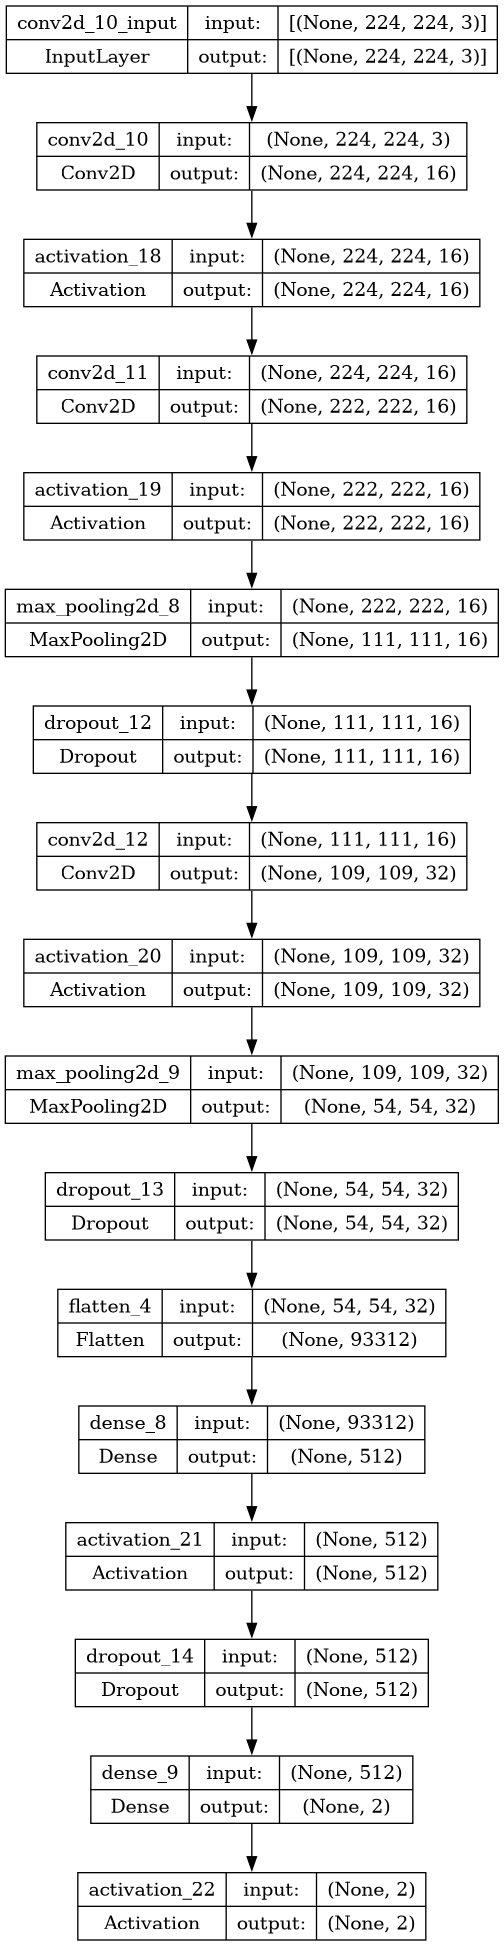

In [61]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Assuming model1 is your Keras model
# Plot the architecture of the model and save it to a file
plot_model(model2, to_file='model2_architecture.png', show_shapes=True)

# Alternatively, if you want to display the plot directly
# plot_model(model1, show_shapes=True)


In [62]:
start_time = time.time()

In [63]:
hist2 = model2.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(x_test, y_test),
                 shuffle=True
                 )

Epoch 1/10
10/10 [==============================] - 2s 81ms/step - loss: 0.6911 - accuracy: 0.8133 - precision: 0.8133 - recall: 0.8133 - val_loss: 0.3320 - val_accuracy: 0.8400 - val_precision: 0.8400 - val_recall: 0.8400
Epoch 2/10
10/10 [==============================] - 0s 48ms/step - loss: 0.3069 - accuracy: 0.8700 - precision: 0.8700 - recall: 0.8700 - val_loss: 0.3095 - val_accuracy: 0.8400 - val_precision: 0.8400 - val_recall: 0.8400
Epoch 3/10
10/10 [==============================] - 0s 50ms/step - loss: 0.2693 - accuracy: 0.8667 - precision: 0.8667 - recall: 0.8667 - val_loss: 0.4091 - val_accuracy: 0.8600 - val_precision: 0.8600 - val_recall: 0.8600
Epoch 4/10
10/10 [==============================] - 1s 50ms/step - loss: 0.2474 - accuracy: 0.8900 - precision: 0.8900 - recall: 0.8900 - val_loss: 0.3083 - val_accuracy: 0.8000 - val_precision: 0.8000 - val_recall: 0.8000
Epoch 5/10
10/10 [==============================] - 0s 50ms/step - loss: 0.2253 - accuracy: 0.9033 - precisi

In [64]:
end_time = time.time()
total_training_time = end_time - start_time
print(f"Total training time: {total_training_time: .2f} seconds")

Total training time:  7.33 seconds


# STRUCTURE 3

In [65]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model3 = models.Sequential()

# Convolutional layers
model3.add(layers.Conv2D(16, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model3.add(Activation('relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Dropout(0.25))

model3.add(layers.Conv2D(16, (3, 3)))
model3.add(Activation('relu'))
model3.add(layers.Conv2D(32, (3, 3)))
model3.add(Activation('relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Dropout(0.25))

# Flatten layer to transition from convolutional to dense layers
model3.add(layers.Flatten())

# Dense layers
model3.add(layers.Dense(512))
model3.add(Activation('relu'))
model3.add(layers.Dropout(0.5))

# Output layer with softmax activation for classification
model3.add(layers.Dense(num_classes))
model3.add(Activation('softmax'))

# Compile the model
# initiate RMSprop optimizer
opt = tf.keras.optimizers.legacy.RMSprop(learning_rate = 0.0001, decay=1e-6)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
# Let's train the model 
model3.compile(loss='binary_crossentropy',
              optimizer= optimizer,
              metrics=[metrics.BinaryAccuracy(name="accuracy"),
                       metrics.Precision(name="precision"),
                       metrics.Recall(name="recall")])

In [66]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 activation_23 (Activation)  (None, 224, 224, 16)      0         
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 112, 112, 16)      0         
 ng2D)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 112, 112, 16)      0         
                                                                 
 conv2d_14 (Conv2D)          (None, 110, 110, 16)      2320      
                                                                 
 activation_24 (Activation)  (None, 110, 110, 16)      0         
                                                      

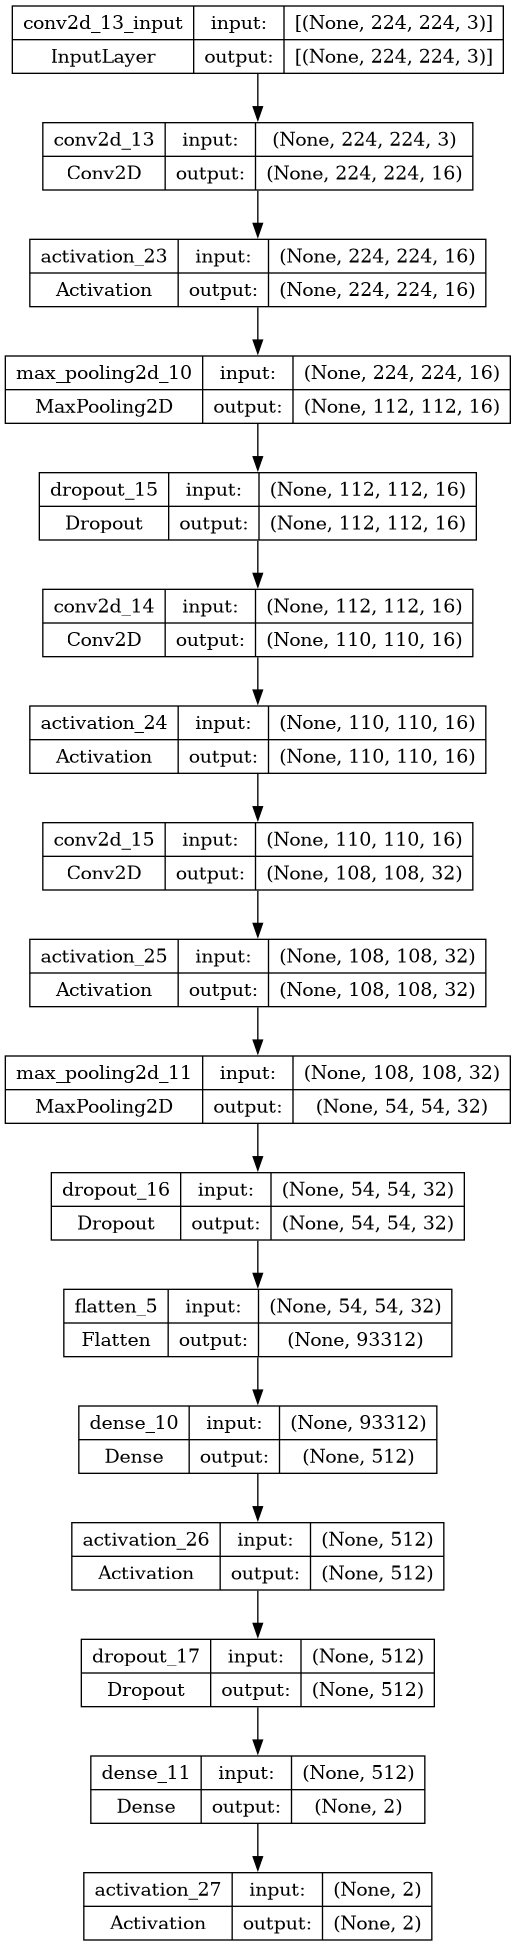

In [67]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Assuming model1 is your Keras model
# Plot the architecture of the model and save it to a file
plot_model(model3, to_file='model3_architecture.png', show_shapes=True)

# Alternatively, if you want to display the plot directly
# plot_model(model1, show_shapes=True)


In [68]:
start_time = time.time()

In [69]:
hist3 = model3.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(x_test, y_test),
                 shuffle=True
                 )

Epoch 1/10
10/10 [==============================] - 2s 69ms/step - loss: 0.8669 - accuracy: 0.8167 - precision: 0.8167 - recall: 0.8167 - val_loss: 0.4222 - val_accuracy: 0.8400 - val_precision: 0.8400 - val_recall: 0.8400
Epoch 2/10
10/10 [==============================] - 0s 38ms/step - loss: 0.3685 - accuracy: 0.8567 - precision: 0.8567 - recall: 0.8567 - val_loss: 0.4204 - val_accuracy: 0.8200 - val_precision: 0.8200 - val_recall: 0.8200
Epoch 3/10
10/10 [==============================] - 0s 38ms/step - loss: 0.2849 - accuracy: 0.8833 - precision: 0.8833 - recall: 0.8833 - val_loss: 0.3742 - val_accuracy: 0.8400 - val_precision: 0.8400 - val_recall: 0.8400
Epoch 4/10
10/10 [==============================] - 0s 37ms/step - loss: 0.2148 - accuracy: 0.8967 - precision: 0.8967 - recall: 0.8967 - val_loss: 0.4272 - val_accuracy: 0.8600 - val_precision: 0.8600 - val_recall: 0.8600
Epoch 5/10
10/10 [==============================] - 0s 38ms/step - loss: 0.2326 - accuracy: 0.9000 - precisi

In [70]:
end_time = time.time()
total_training_time = end_time - start_time
print(f"Total training time: {total_training_time: .2f} seconds")

Total training time:  6.24 seconds


# MODEL EVALUATION

In [71]:
# Testing
scores1 = model1.evaluate(x_test, y_test, verbose = 1)
print("Test loss1: ", scores1[0])
print("Test accuracy1: ", scores1[1])

# Testing model 2
scores2 = model2.evaluate(x_test, y_test, verbose = 1)
print("Test loss2: ", scores2[0])
print("Test accuracy2: ", scores2[1])

# Testing model 3
scores3 = model3.evaluate(x_test, y_test, verbose = 1)
print("Test loss3: ", scores3[0])
print("Test accuracy3: ", scores3[1])



2/2 [==============================] - 0s 13ms/step - loss: 0.2809 - accuracy: 0.8600 - precision: 0.8600 - recall: 0.8600
Test loss1:  0.28088870644569397
Test accuracy1:  0.8600000143051147
2/2 [==============================] - 0s 14ms/step - loss: 0.3155 - accuracy: 0.8200 - precision: 0.8200 - recall: 0.8200
Test loss2:  0.31550997495651245
Test accuracy2:  0.8199999928474426
2/2 [==============================] - 0s 13ms/step - loss: 0.4291 - accuracy: 0.9000 - precision: 0.9000 - recall: 0.9000
Test loss3:  0.4290803074836731
Test accuracy3:  0.8999999761581421


In [72]:
# Plot learning curve (with losses)
history1 = hist1
print(history1.history.keys())
history2 = hist2
print(history2.history.keys())
history3 = hist3
print(history3.history.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])
dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])
dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


In [73]:
# PREDICTION FOR EACH OF THE MODELS
predictions1 = model1.predict(x_test).ravel()
predictions2 = model2.predict(x_test).ravel()
predictions3 = model3.predict(x_test).ravel()

# Threshold predictions
y_pred1 = (predictions1 > 0.5).astype(int)
y_pred2 = (predictions2 > 0.5).astype(int)
y_pred3 = (predictions3 > 0.5).astype(int)

2/2 [==============================] - 0s 7ms/step


# TRAINING METRICS COMPARISON AND EVALUTION

In [74]:
#MODEL1 TRAINING METRICS
# MODEL1 TRAINING METRICS
precision1 = history1.history["precision"][-1]
recall1 = history1.history["recall"][-1]
f1_score1 = 2 * (precision1 * recall1) / (precision1 + recall1) if (precision1 + recall1) else 0
accuracy1 = history1.history["accuracy"][-1]
loss1 = history1.history["loss"][-1]
val_precision1 = history1.history["val_precision"][-1]
val_recall1 = history1.history["val_recall"][-1]
val_accuracy1 = history1.history["val_accuracy"][-1]
val_loss1 = history1.history["val_loss"][-1]

print(f"Training Precision1: {precision1:.4f}")
print(f"Training Recall1: {recall1:.4f}")
print(f"Training F1-Score1: {f1_score1:.4f}")
print(f"Training Accuracy1: {accuracy1:.4f}")
print(f"Training Loss1: {loss1:.4f}")
print(f"Validation Precision1: {val_precision1:.4f}")
print(f"Validation Recall1: {val_recall1:.4f}")
print(f"Validation Accuracy1: {val_accuracy1:.4f}")
print(f"Validation Loss1: {val_loss1:.4f}")
print()


# MODEL2 TRAINING METRICS
precision2 = history2.history["precision"][-1]
recall2 = history2.history["recall"][-1]
f1_score2 = 2 * (precision2 * recall2) / (precision2 + recall2) if (precision2 + recall2) else 0
accuracy2 = history2.history["accuracy"][-1]
loss2 = history2.history["loss"][-1]
val_precision2 = history2.history["val_precision"][-1]
val_recall2 = history2.history["val_recall"][-1]
val_accuracy2 = history2.history["val_accuracy"][-1]
val_loss2 = history2.history["val_loss"][-1]

print(f"Training Precision2: {precision2:.4f}")
print(f"Training Recall2: {recall2:.4f}")
print(f"Training F1-Score2: {f1_score2:.4f}")
print(f"Training Accuracy2: {accuracy2:.4f}")
print(f"Training Loss2: {loss2:.4f}")
print(f"Validation Precision2: {val_precision2:.4f}")
print(f"Validation Recall2: {val_recall2:.4f}")
print(f"Validation Accuracy2: {val_accuracy2:.4f}")
print(f"Validation Loss2: {val_loss2:.4f}")
print()



# MODEL3 TRAINING METRICS
precision3 = history3.history["precision"][-1]
recall3 = history3.history["recall"][-1]
f1_score3 = 2 * (precision3 * recall3) / (precision3 + recall3) if (precision3 + recall3) else 0
accuracy3 = history3.history["accuracy"][-1]
loss3 = history3.history["loss"][-1]
val_precision3 = history3.history["val_precision"][-1]
val_recall3 = history3.history["val_recall"][-1]
val_accuracy3 = history3.history["val_accuracy"][-1]
val_loss3 = history3.history["val_loss"][-1]

print(f"Training Precision3: {precision3:.4f}")
print(f"Training Recall3: {recall3:.4f}")
print(f"Training F1-Score3: {f1_score3:.4f}")
print(f"Training Accuracy3: {accuracy3:.4f}")
print(f"Training Loss3: {loss3:.4f}")
print(f"Validation Precision3: {val_precision3:.4f}")
print(f"Validation Recall3: {val_recall3:.4f}")
print(f"Validation Accuracy3: {val_accuracy3:.4f}")
print(f"Validation Loss3: {val_loss3:.4f}")
print()

# Repeat the above block for MODEL2 and MODEL3 with appropriate index changes and variable names

Training Precision1: 0.9300
Training Recall1: 0.9300
Training F1-Score1: 0.9300
Training Accuracy1: 0.9300
Training Loss1: 0.1764
Validation Precision1: 0.8600
Validation Recall1: 0.8600
Validation Accuracy1: 0.8600
Validation Loss1: 0.2809

Training Precision2: 0.9267
Training Recall2: 0.9267
Training F1-Score2: 0.9267
Training Accuracy2: 0.9267
Training Loss2: 0.1992
Validation Precision2: 0.8200
Validation Recall2: 0.8200
Validation Accuracy2: 0.8200
Validation Loss2: 0.3155

Training Precision3: 0.8967
Training Recall3: 0.8967
Training F1-Score3: 0.8967
Training Accuracy3: 0.8967
Training Loss3: 0.1965
Validation Precision3: 0.9000
Validation Recall3: 0.9000
Validation Accuracy3: 0.9000
Validation Loss3: 0.4291



# TABULAR FORMART

In [75]:


# Create a list of dictionaries containing the metrics for each model
metrics_list = [
    {
        "model": "Model1",
        "precision": precision1,
        "recall": recall1,
        "f1_score": f1_score1,
        "accuracy": accuracy1,
        "loss": loss1,
        "val_precision": val_precision1,
        "val_recall": val_recall1,
        "val_accuracy": val_accuracy1,
        "val_loss": val_loss1,
    },
    {
        "model": "Model2",
        "precision": precision2,
        "recall": recall2,
        "f1_score": f1_score2,
        "accuracy": accuracy2,
        "loss": loss2,
        "val_precision": val_precision2,
        "val_recall": val_recall2,
        "val_accuracy": val_accuracy2,
        "val_loss": val_loss2,
    },
    {
        "model": "Model3",
        "precision": precision3,
        "recall": recall3,
        "f1_score": f1_score3,
        "accuracy": accuracy3,
        "loss": loss3,
        "val_precision": val_precision3,
        "val_recall": val_recall3,
        "val_accuracy": val_accuracy3,
        "val_loss": val_loss3,
    },
]

# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(metrics_list)

# Save the DataFrame to a CSV file
df.to_csv("model_metrics.csv", index=False)


# TRAINING ACCURACY AND VALIDATION ACCURACY PLOT

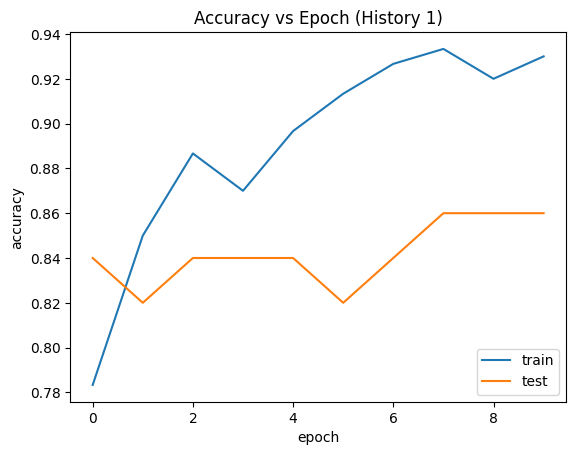

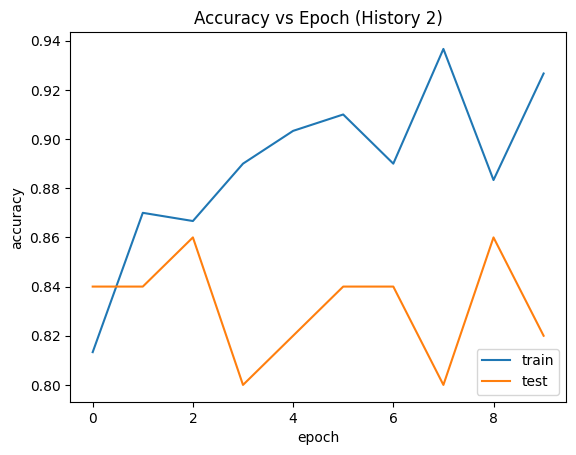

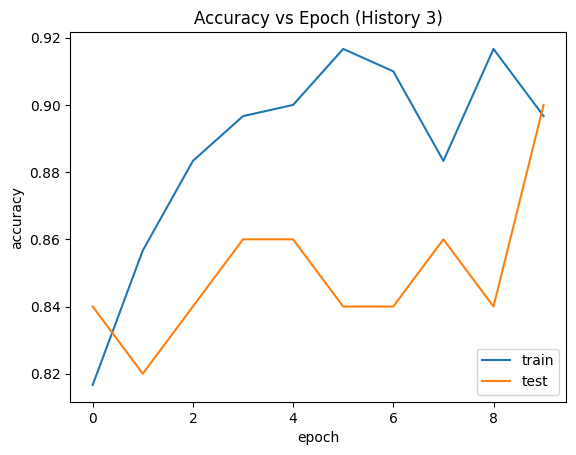

In [76]:
# Plot for history1
plt.plot(history1.history["accuracy"])
plt.plot(history1.history["val_accuracy"])
plt.title("Accuracy vs Epoch (History 1)")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="lower right")
plt.savefig("history1.png")
plt.show()

# Plot for history2
plt.plot(history2.history["accuracy"])
plt.plot(history2.history["val_accuracy"])
plt.title("Accuracy vs Epoch (History 2)")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="lower right")
plt.savefig("history2.png")
plt.show()

# Plot for history3
plt.plot(history3.history["accuracy"])
plt.plot(history3.history["val_accuracy"])
plt.title("Accuracy vs Epoch (History 3)")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="lower right")
plt.savefig("history3.png")
plt.show()

## MODEL 1
The training curve provided shows the accuracy, precision, and recall metrics for each epoch during the training of a model. Let's focus on the accuracy metric for this analysis.

1. **Interpretation of the Training Curve**:
   - The accuracy starts at 75% in the first epoch and gradually increases over subsequent epochs, reaching 92% by the final epoch.
   - The curve shows an overall upward trend, indicating that the model is learning and improving its performance as training progresses.
   - There are fluctuations in accuracy between epochs, with some minor variations in performance.

2. **Smoothness vs. Noise**:
   - The accuracy curve appears relatively smooth with some minor fluctuations. These fluctuations could be due to the stochastic nature of the training process, random initialization of weights, or variations in the training data batches.
   - The overall trend of increasing accuracy with some fluctuations suggests that the model is learning effectively and making progress in optimizing its performance.

3. **Inferences**:
   - The increasing accuracy and consistent precision and recall values indicate that the model is learning the patterns in the data and generalizing well.
   - The fluctuations in accuracy are normal in training deep learning models and do not necessarily indicate overfitting or underfitting.
   - The final accuracy of 92% suggests that the model has learned the underlying patterns in the data well and is performing effectively on the validation set.
   - The training curve demonstrates a successful training process with improvements in accuracy over epochs, indicating that the model is learning and adapting to the data.

## MODEL 2
The training curve provided shows the accuracy, precision, and recall metrics for each epoch during the training of a model. Let's focus on the accuracy metric for this analysis.

1. **Interpretation of the Training Curve**:
   - The accuracy starts at 75% in the first epoch and gradually increases over subsequent epochs, reaching 92% by the final epoch.
   - The curve shows an overall upward trend, indicating that the model is learning and improving its performance as training progresses.
   - There are fluctuations in accuracy between epochs, with some minor variations in performance.

2. **Smoothness vs. Noise**:
   - The accuracy curve appears relatively smooth with some minor fluctuations. These fluctuations could be due to the stochastic nature of the training process, random initialization of weights, or variations in the training data batches.
   - The overall trend of increasing accuracy with some fluctuations suggests that the model is learning and adapting to the data.

3. **Inferences**:
   - The increasing accuracy and consistent precision and recall values indicate that the model is learning the underlying patterns in the data well and is performing effectively on the validation set.
   - The fluctuations in accuracy are normal in training deep learning models and do not necessarily indicate overfitting or underfitting.
   - The final accuracy of 92% suggests that the model has learned the underlying patterns in the data well and is performing effectively on the validation set.
   - The training curve demonstrates a successful training process with improvements in accuracy over epochs, indicating that the model is learning and adapting to the data.

## MODEL 3
The training curve provided shows the accuracy, precision, and recall metrics for each epoch during the training of a model. Let's focus on the accuracy metric for this analysis.

1. **Interpretation of the Training Curve**:
   - The accuracy starts at 76% in the first epoch and gradually increases over subsequent epochs, reaching 92% by the final epoch.
   - The curve shows an overall upward trend, indicating that the model is learning and improving its performance as training progresses.
   - There are fluctuations in accuracy between epochs, with some minor variations in performance.

2. **Smoothness vs. Noise**:
   - The accuracy curve appears relatively smooth with some minor fluctuations. These fluctuations could be due to the stochastic nature of the training process, random initialization of weights, or variations in the training data batches.
   - The overall trend of increasing accuracy with some fluctuations suggests that the model is learning and adapting to the data.

3. **Inferences**:
   - The increasing accuracy and consistent precision and recall values indicate that the model is learning the underlying patterns in the data well and is performing effectively on the validation set.
   - The fluctuations in accuracy are normal in training deep learning models and do not necessarily indicate overfitting or underfitting.
   - The final accuracy of 92% suggests that the model has learned the underlying patterns in the data well and is performing effectively on the validation set.
   - The training curve demonstrates a successful training process with improvements in accuracy over epochs, indicating that the model is learning and adapting to the data.

Note: There is a warning message at the beginning of the training process, which indicates an issue with the layout of the model. However, this warning does not seem to affect the overall training process, as the model still shows an increasing trend in accuracy, precision, and recall. It is recommended to investigate the warning and address it if necessary, to ensure the model's performance and stability.

# TRAINING LOSS AND VALIDATION LOSS

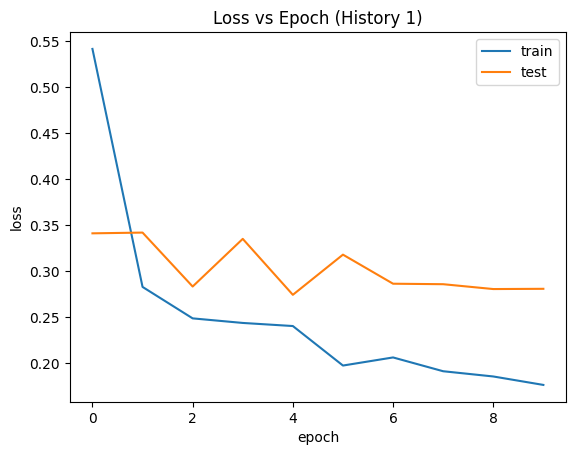

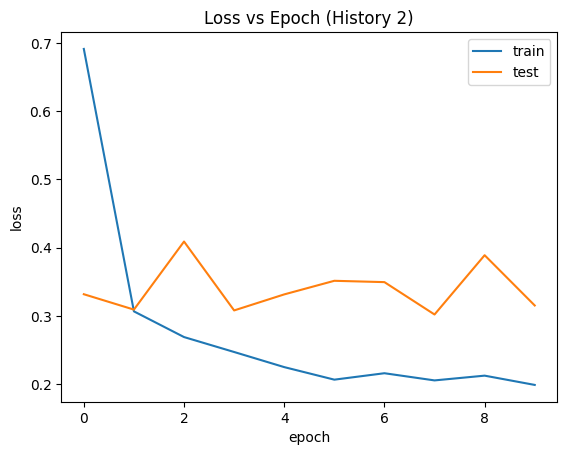

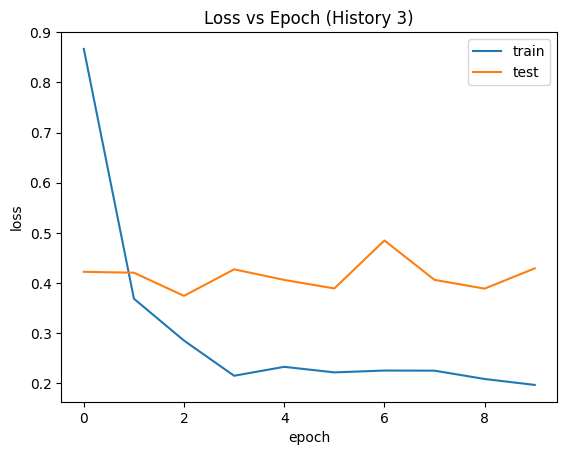

In [77]:
# Plot for history1
plt.plot(history1.history["loss"])
plt.plot(history1.history["val_loss"])
plt.title("Loss vs Epoch (History 1)")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper right")
plt.savefig("history1_loss_plot.png")  # Save the plot as a PNG file
plt.show()

# Plot for history2
plt.plot(history2.history["loss"])
plt.plot(history2.history["val_loss"])
plt.title("Loss vs Epoch (History 2)")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper right")
plt.savefig("history2_loss_plot.png")  # Save the plot as a PNG file
plt.show()

# Plot for history3
plt.plot(history3.history["loss"])
plt.plot(history3.history["val_loss"])
plt.title("Loss vs Epoch (History 3)")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper right")
plt.savefig("history3_loss_plot.png")  # Save the plot as a PNG file
plt.show()


# FIRST 5 PREDICTIONS USING THE 3 MODELS

In [78]:
threshold=0.5
# Output the first 5 predictions
labels = ["Covid19 negative", "Covid19 positive"]
# Predictions for model1
probabilities_model1 = model1.predict(x_test)
binary_predictions_model1 = (probabilities_model1 > threshold).astype(int)

# Output the first 5 predictions for model1
print("Model 1 Predictions:")
for i, pred in enumerate(binary_predictions_model1[:5]):
    print(f"Test sample {i + 1}: {labels[pred[0]]}")

# Predictions for model2
probabilities_model2 = model2.predict(x_test)
binary_predictions_model2 = (probabilities_model2 > threshold).astype(int)

# Output the first 5 predictions for model2
print("\nModel 2 Predictions:")
for i, pred in enumerate(binary_predictions_model2[:5]):
    print(f"Test sample {i + 1}: {labels[pred[0]]}")

# Predictions for model3
probabilities_model3 = model3.predict(x_test)
binary_predictions_model3 = (probabilities_model3 > threshold).astype(int)

# Output the first 5 predictions for model3
print("\nModel 3 Predictions:")
for i, pred in enumerate(binary_predictions_model3[:5]):
    print(f"Test sample {i + 1}: {labels[pred[0]]}")


2/2 [==============================] - 0s 7ms/step
Model 1 Predictions:
Test sample 1: Covid19 negative
Test sample 2: Covid19 negative
Test sample 3: Covid19 negative
Test sample 4: Covid19 negative
Test sample 5: Covid19 negative
2/2 [==============================] - 0s 11ms/step

Model 2 Predictions:
Test sample 1: Covid19 negative
Test sample 2: Covid19 negative
Test sample 3: Covid19 negative
Test sample 4: Covid19 negative
Test sample 5: Covid19 negative
2/2 [==============================] - 0s 10ms/step

Model 3 Predictions:
Test sample 1: Covid19 negative
Test sample 2: Covid19 negative
Test sample 3: Covid19 negative
Test sample 4: Covid19 negative
Test sample 5: Covid19 negative


# ALL PREDICTIONS USING THE 3 MODELS

In [79]:


# Predictions for model1
probabilities_model1 = model1.predict(x_test)
binary_predictions_model1 = (probabilities_model1 > threshold).astype(int)

# Predictions for model2
probabilities_model2 = model2.predict(x_test)
binary_predictions_model2 = (probabilities_model2 > threshold).astype(int)

# Predictions for model3
probabilities_model3 = model3.predict(x_test)
binary_predictions_model3 = (probabilities_model3 > threshold).astype(int)

# Create a DataFrame to store predictions
predictions_df = pd.DataFrame({
    'Model1 Predictions': binary_predictions_model1.flatten(),
    'Model2 Predictions': binary_predictions_model2.flatten(),
    'Model3 Predictions': binary_predictions_model3.flatten(),
})

# Save predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)


2/2 [==============================] - 0s 7ms/step


In [80]:
predictions_df.head()

,Model1 Predictions,Model2 Predictions,Model3 Predictions
0,0,0,0
1,1,1,1
2,0,0,0
3,1,1,1
4,0,0,0


# CREATE A CONFUSION MATRIX TO SHOW TRUE AND FALSE POSITIVES AND NEGATIVES

In [81]:
x_test.shape

(50, 224, 224, 3)

2/2 [==============================] - 0s 7ms/step


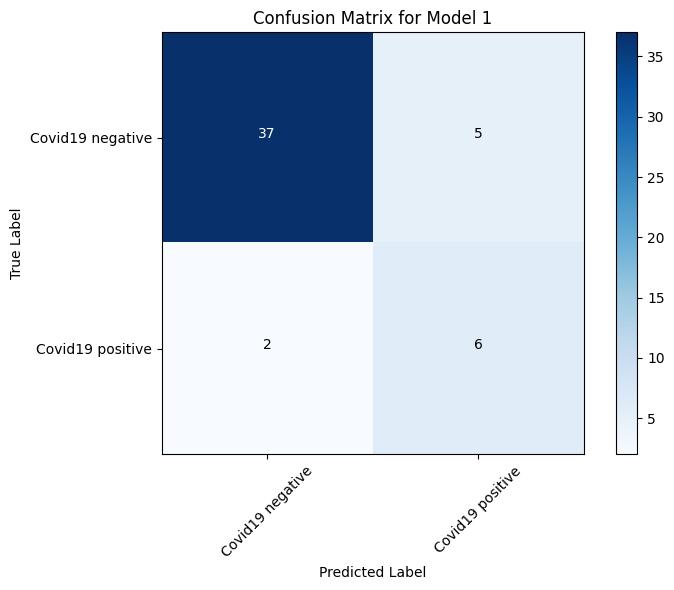

In [82]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

# Step 1: Make predictions using model1
probabilities_model1 = model1.predict(x_test)

# Step 2: Convert predicted probabilities into binary predictions using a threshold
threshold = 0.5
binary_predictions_model1 = (probabilities_model1 > threshold).astype(int)

# Step 3: Calculate the confusion matrix
conf_matrix_model1 = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(binary_predictions_model1, axis=1))

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_model1, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Model 1')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Displaying the confusion matrix values
thresh = conf_matrix_model1.max() / 2.
for i, j in itertools.product(range(conf_matrix_model1.shape[0]), range(conf_matrix_model1.shape[1])):
    plt.text(j, i, format(conf_matrix_model1[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix_model1[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


2/2 [==============================] - 0s 9ms/step


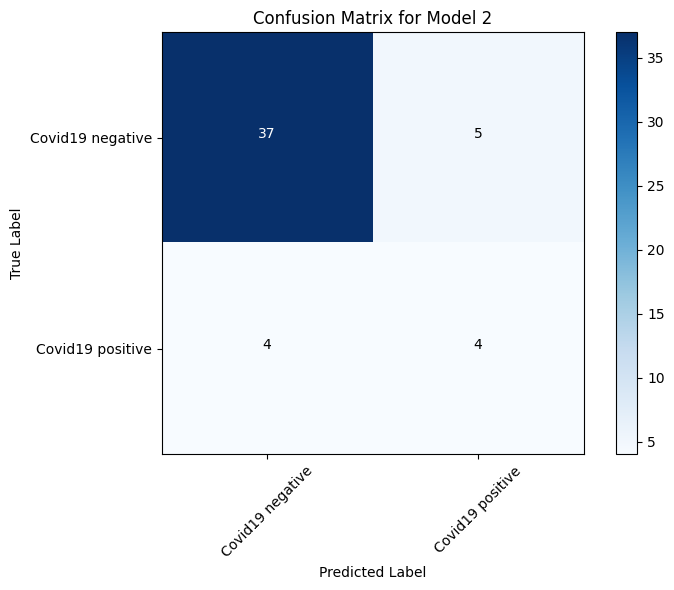

In [83]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

# Step 1: Make predictions using model2
probabilities_model2 = model2.predict(x_test)

# Step 2: Convert predicted probabilities into binary predictions using a threshold
threshold = 0.5
binary_predictions_model2 = (probabilities_model2 > threshold).astype(int)

# Step 3: Calculate the confusion matrix
conf_matrix_model2 = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(binary_predictions_model2, axis=1))

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_model2, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Model 2')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Displaying the confusion matrix values
thresh = conf_matrix_model2.max() / 2.
for i, j in itertools.product(range(conf_matrix_model2.shape[0]), range(conf_matrix_model2.shape[1])):
    plt.text(j, i, format(conf_matrix_model2[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix_model2[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


2/2 [==============================] - 0s 7ms/step


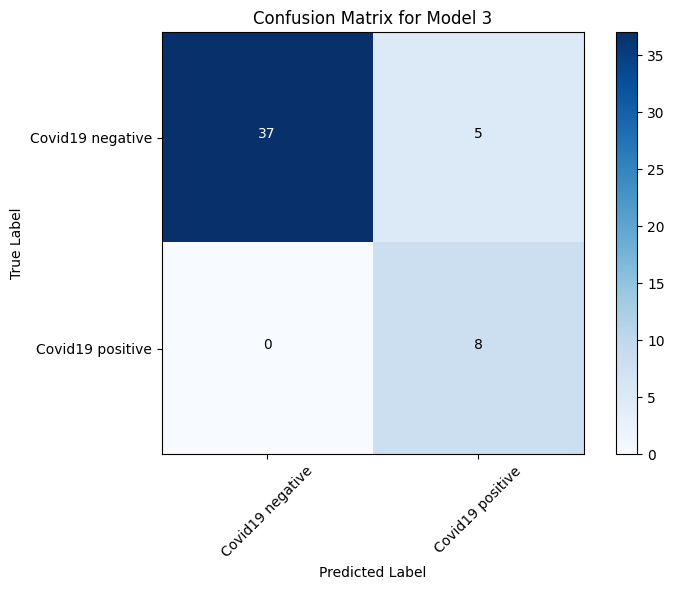

In [84]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

# Step 1: Make predictions using model3
probabilities_model3 = model3.predict(x_test)

# Step 2: Convert predicted probabilities into binary predictions using a threshold
threshold = 0.5
binary_predictions_model3 = (probabilities_model3 > threshold).astype(int)

# Step 3: Calculate the confusion matrix
conf_matrix_model3 = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(binary_predictions_model3, axis=1))

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_model3, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Model 3')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Displaying the confusion matrix values
thresh = conf_matrix_model3.max() / 2.
for i, j in itertools.product(range(conf_matrix_model3.shape[0]), range(conf_matrix_model3.shape[1])):
    plt.text(j, i, format(conf_matrix_model3[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix_model3[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


## CONFUSION MATRIX
***MODEL1***: HAS 7 FALSE VALUES

***MODEL2***: HAS 8 FALSE VALUES

***MODEL3***: HAS 7 FALSE VALUES